# **Lab 3.2: Machine Learning (Regression)**

<hr>

## **1. Introduction**

In the previous practice, we focused on solving problems where the goal was to predict a class based on an input (classification). 

To complete the *machine learning* diagram, specifically within the field of *supervised learning*, we still need to explore **regression problems**.

<center><img src="ML_Diagram.png" alt="diagram" width="1000'/></center>

As you know, in a regression problem, we aim to predict one or more **numerical values**. Similar to classification, solving supervised learning regression problems requires **labeled data**, meaning data where we already know the expected output or correct label for a given input.

These data points will be used by the model to attempt to learn the *unknown formula* during training.

### **Objective**
In this practice, you will learn how to solve regression problems using different models and how to evaluate their performance.


<hr>

## **2. Exercise 1**

We are asked to perform the following task:

> Create a model that, given the time in the first sector `Sector1Time`, can predict the total lap time `LapTime`.    

Let's reload our data and generate the necessary dataset to solve the problem.

In [66]:
import pandas as pd

seed = 2533

data = pd.read_pickle('https://raw.githubusercontent.com/AIC-Uniovi/Sistemas-Inteligentes/refs/heads/main/datasets/f1_23_monaco.pkl')

<div class='alert alert-block alert-info'>
    <b>Exercise:</b> Create a scatter plot to analyze the relationship between both variables.
</div>

<Axes: xlabel='Sector1Time', ylabel='LapTime'>

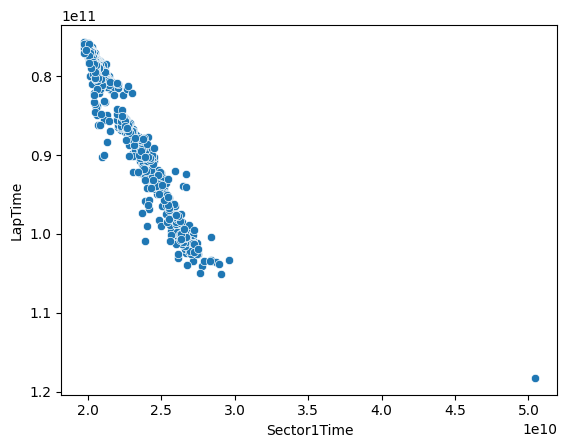

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your code here

sns.scatterplot(data=data, x='Sector1Time', y='LapTime')

<div class="alert alert-block alert-info">
    <b>Exercise:</b> Remove the <i>outlier</i> from the dataframe and generate the graph again. Given the new graph, would you say that the relationship between the variables is <strong>linear</strong> or <strong>non-linear</strong>?
</div>

<Axes: xlabel='Sector1Time', ylabel='LapTime'>

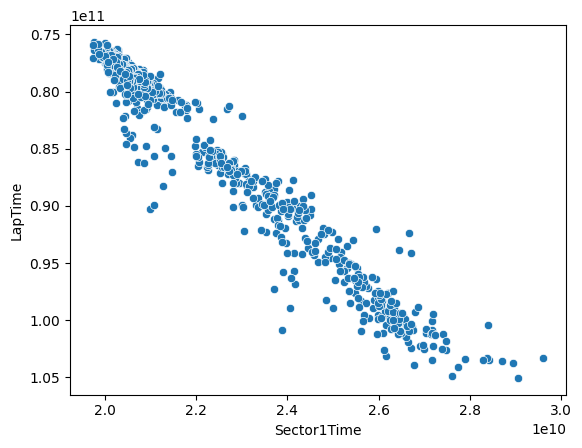

In [68]:
# Your code here

data_cleaned = data[data['Sector1Time'].dt.total_seconds() < 35]

sns.scatterplot(data=data_cleaned, x='Sector1Time', y='LapTime')

Depending on the type of relationship, we will need to select different regression models.

<div class="alert alert-block alert-warning">
    We cannot always visually analyze this relationship. In this case, we can because we only have two variables, but this is not usually possible.
</div>

### **Datasets**

Regardless of the chosen model, just like in the classification section, it will be necessary to create a labeled dataset (with X and Y) and split it into training and test sets.

<div class="alert alert-block alert-info">
    <b>Exercise:</b> Create the DataFrame <code>data_sector2lap</code> with the necessary columns to solve this problem. Convert the timedelta columns to float using <code>data["columnname"].dt.total_seconds()</code>. Split the data into training and test sets (80/20), then <b>standardize</b> the X values.
</div>

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


data_sector2lap = data_cleaned[['Sector1Time', 'LapTime']].copy()


data_sector2lap['Sector1Time'] = data_sector2lap['Sector1Time'].dt.total_seconds()
data_sector2lap['LapTime'] = data_sector2lap['LapTime'].dt.total_seconds()


X = data_sector2lap[['Sector1Time']] 
y = data_sector2lap['LapTime']  

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=seed)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test) 


Let's verify the training and test data with the following plot:

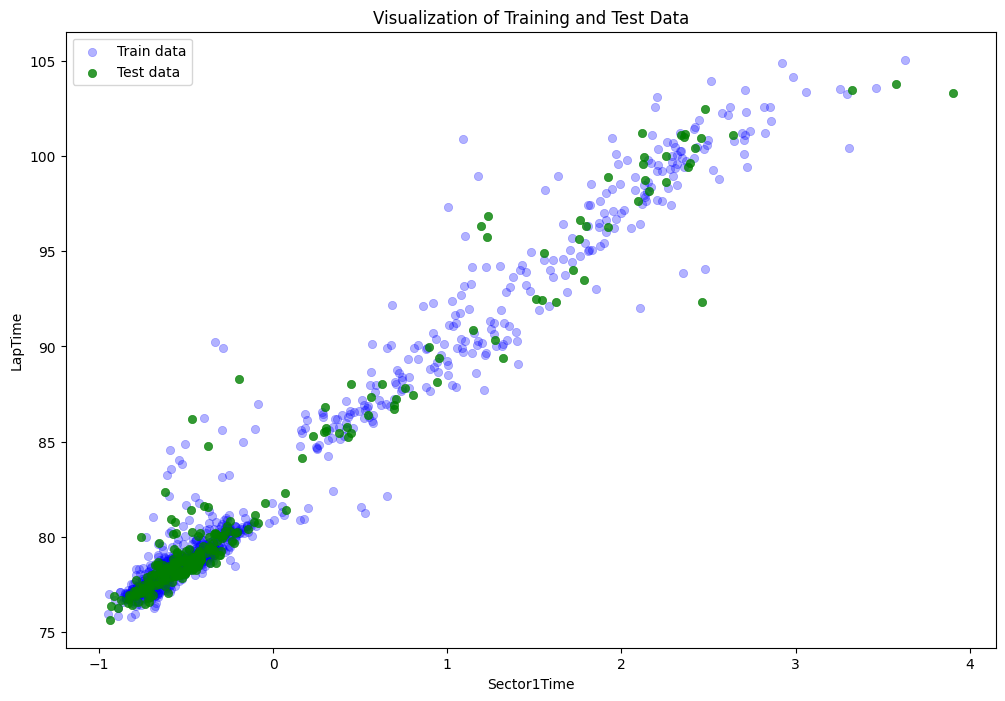

In [70]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = X_train_scaled.flatten(), y = Y_train, color = ('blue', 0.3), edgecolors = None, label = 'Train data')
plot = sns.scatterplot(x = X_test_scaled.flatten(), y = Y_test, color = ('green', 0.8), edgecolors = None, label = 'Test data')
plot.set_xlabel('Sector1Time')
plot.set_ylabel('LapTime')
plot.set_title('Visualization of Training and Test Data')
plt.show()

### **Baseline and Metrics**  
Once the datasets have been created and preprocessed, we can proceed to solve the problem. Just like in classification problems, regression also has several **baselines**.

The most commonly used is the `Mean` model, which simply always returns the mean of the training set's $Y$ values. There are also versions that use the median or predefined quantiles.

<div class="alert alert-block alert-info">
    <b>Exercise:</b> Create and train a "Mean" baseline using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html"><code>DummyRegressor()</code></a> class from <i>scikit-learn</i>. Store the model in the variable <code>baseline_media</code>.
</div>

In [71]:
# Your code here

from sklearn.dummy import DummyRegressor


baseline_media = DummyRegressor(strategy='mean')
baseline_media.fit(X_train_scaled, Y_train)



DummyRegressor()

Once we have the model, since we are working in 2D, we can represent it in the previous plot.

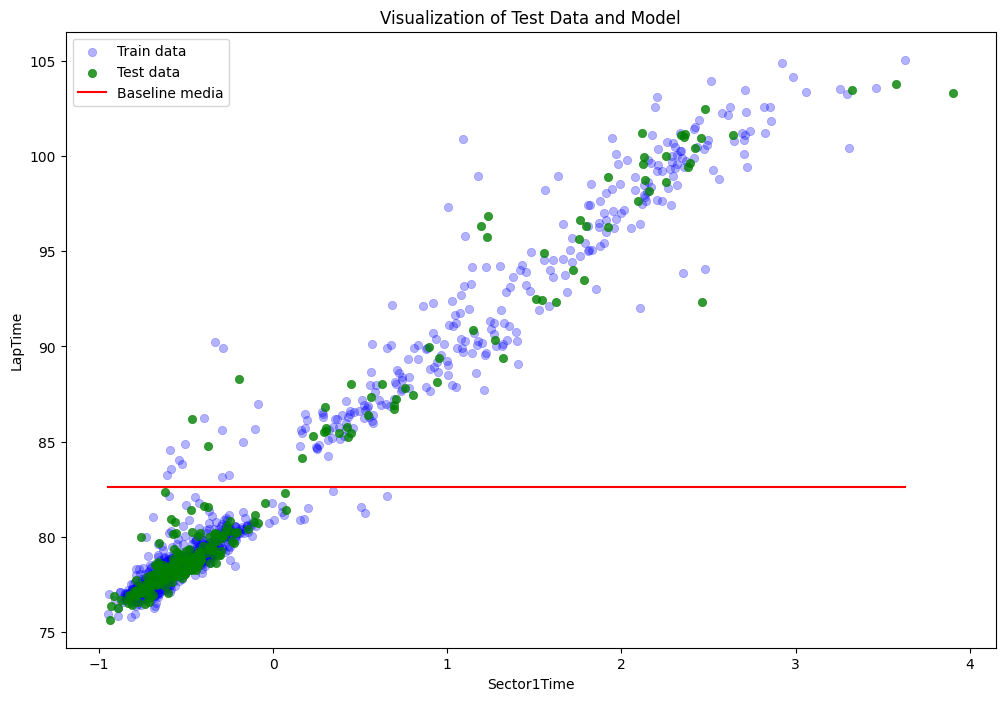

In [72]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = X_train_scaled.flatten(), y = Y_train, color = ('blue', 0.3), edgecolors = None, label = 'Train data')
sns.scatterplot(x = X_test_scaled.flatten(), y = Y_test, color = ('green', 0.8), edgecolors = None, label = 'Test data')
plot = sns.lineplot(x = X_train_scaled.flatten(), y = baseline_media.predict(X_train_scaled), color = 'red', label = 'Baseline media')
plot.set_xlabel('Sector1Time')
plot.set_ylabel('LapTime')
plot.set_title('Visualization of Test Data and Model')
plt.show()

As you can see, the baseline does not fit the training data very well, so its performance will leave much to be desired.

To quantify the predictive ability of the model, we will, just like in classification, obtain some **metrics**.

<div class="alert alert-block alert-warning">
    Classification metrics cannot be used in regression problems. The former are designed to work with probabilities (values between 0 and 1), while regression metrics work with real numbers (values between -inf and inf).
</div>

For this type of problem, two main metrics are used, which are limited to calculating **the differences between the actual $Y$ values and the predicted values $\hat{Y}$**. These are:
* **MAE:** Mean Absolute Error, implemented in the method [`mean_absolute_error(Y_test, Y_pred)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error).

* **MSE:** Mean Squared Error, implemented in the method [`mean_squared_error(Y_test, Y_pred)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error).

* **$R^2$:** Coefficient of Determination, implemented in the method [`r2_score(Y_test, Y_pred)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html).

<div class="alert alert-block alert-warning">
    <strong>Since both <i>MAE</i> and <i>MSE</i> measure errors, they are better the smaller their value. The <i>Coefficient of Determination</i>, on the other hand, is better the closer it is to 1.</strong>
</div>

<div class="alert alert-block alert-info">
    <b>Exercise:</b> Obtain the metrics mentioned above for the baseline on both the <i>training</i> and <i>test</i> sets.
</div>

In [82]:
# Your code here

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred_train_baseline = baseline_media.predict(X_train_scaled)
y_pred_test_baseline = baseline_media.predict(X_test_scaled)

mae_test = mean_absolute_error(Y_test, y_pred_test_baseline)
mse_test = mean_squared_error(Y_test, y_pred_test_baseline)
r2_test = r2_score(Y_test, y_pred_test_baseline)

print(f"--- Test ---")
print(f"Mean Absolute Error Test: {mae_test}")
print(f"Mean Squared Error Test: {mse_test}")
print(f"R-squared Test(R²): {r2_test}\n")

mae_train = mean_absolute_error(Y_train, y_pred_train_baseline)
mse_train = mean_squared_error(Y_train, y_pred_train_baseline)
r2_train = r2_score(Y_train, y_pred_train_baseline)

print(f"--- Train ---")
print(f"Mean Absolute Error Train: {mae_train}")
print(f"Mean Squared Error Train: {mse_train}")
print(f"R-squared Train(R²): {r2_train}")

--- Test ---
Mean Absolute Error Test: 5.6741410820789575
Mean Squared Error Test: 51.03874148105154
R-squared Test(R²): -0.002479871777153031

--- Train ---
Mean Absolute Error Train: 5.945402309799259
Mean Squared Error Train: 54.16377531940761
R-squared Train(R²): 0.0


### **Other Models**

As you can see, the results are far from ideal (as expected from the previous plot), so it is necessary to use more complex models that leverage the input data.

In this practice, we will explore the following:

* **Linear Regression:** Learns linear relationships between input and output variables.
* **Polynomial Regression:** Extends linear regression by allowing non-linear relationships through the use of polynomials.
* **K-Nearest Neighbors (KNN):** A regression algorithm that predicts the value of an instance based on the average of the values of its $k$ nearest neighbors.
* **Decision Trees:** A regression model that creates a tree to predict a value based on the features of the data (inputs).
* **SVR (Support Vector Regression):** The regression version of SVM. Like in classification, without kernel functions, it can only learn linear relationships. It aims to ensure that most examples are within the $e$-tube.

<div class="alert alert-block alert-info">
    <b>Exercise:</b> Train a <i>Linear Regression</i> model (<code>model_linear</code>) and evaluate its performance on both the <i>training</i> and <i>test</i> sets.
</div>

In [89]:
# Your code here

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


model_linear = LinearRegression()
model_linear.fit(X_train_scaled, Y_train)

y_pred_train_linear = model_linear.predict(X_train_scaled)
y_pred_test_linear = model_linear.predict(X_test_scaled)


mae_train_linear = mean_absolute_error(Y_train, y_pred_train_linear)
mse_train_linear = mean_squared_error(Y_train, y_pred_train_linear)
r2_train_linear = r2_score(Y_train, y_pred_train_linear)


print(f"--- Train ---")
print(f"Mean Absolute Error (Train): {mae_train_linear}")
print(f"Mean Squared Error (Train): {mse_train_linear}")
print(f"R-squared (Train): {r2_train_linear}")


mae_test_linear = mean_absolute_error(Y_test, y_pred_test_linear)
mse_test_linear = mean_squared_error(Y_test, y_pred_test_linear)
r2_test_linear = r2_score(Y_test, y_pred_test_linear)


print(f"\n--- Test ---")
print(f"Mean Absolute Error (Test): {mae_test_linear}")
print(f"Mean Squared Error (Test): {mse_test_linear}")
print(f"R-squared (Test): {r2_test_linear}")



--- Train ---
Mean Absolute Error (Train): 0.8342251529042647
Mean Squared Error (Train): 1.9381359715964384
R-squared (Train): 0.9642171181723004

--- Test ---
Mean Absolute Error (Test): 0.8659393395138129
Mean Squared Error (Test): 2.1867804832320266
R-squared (Test): 0.9570482469821656


To verify the learned model, we will plot the resulting model again.

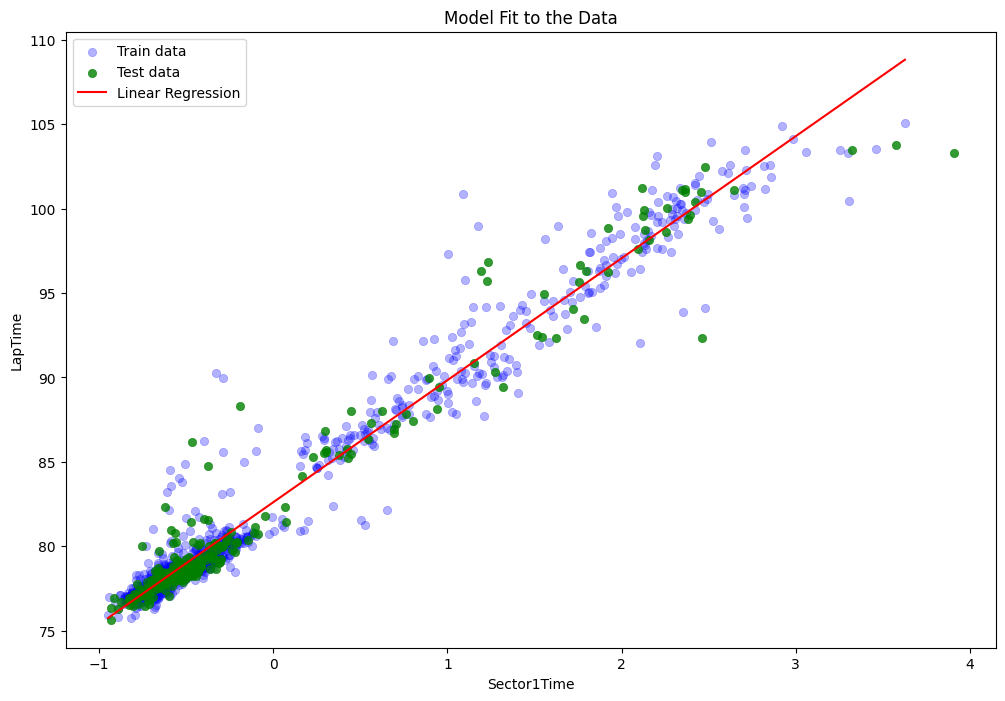

In [90]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = X_train_scaled.flatten(), y = Y_train, color = ('blue', 0.3), edgecolors = None, label = 'Train data')
sns.scatterplot(x = X_test_scaled.flatten(), y = Y_test, color = ('green', 0.8), edgecolors = None, label = 'Test data')
plot = sns.lineplot(x = X_train_scaled.flatten(), y = model_linear.predict(X_train_scaled), color = 'red', label = 'Linear Regression')
plot.set_xlabel('Sector1Time')
plot.set_ylabel('LapTime')
plot.set_title('Model Fit to the Data')
plt.show()

As you can see, this model fits the training data much better, and as a result, it performs better with the test set.

#### **Is it possible to improve the results even further?**

Now, let's try to solve the problem using a non-linear method: **Polynomial Regression**.

This model doesn't have a direct class in *Scikit-learn*, but we can use `PolynomialFeatures`. This class transforms our data into polynomial *features*.

For example, if we have a single *feature* $x$ and choose a degree of 3, `PolynomialFeatures` will create two new *features*, $x^3$, $x^2$, and $x$.

This allows us to fit a linear model to the transformed data, which is equivalent to fitting a polynomial model to the original data.

In [98]:
from sklearn.preprocessing import PolynomialFeatures

# Transform the features into polynomial features
poly = PolynomialFeatures(degree = 3) 
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Fit the linear regression model to the polynomial features
model_poly = LinearRegression()
model_poly.fit(X_train_poly, Y_train)

# Evaluate the model on the training set
print(f"--- Train ---")
print(mean_absolute_error(Y_train, model_poly.predict(X_train_poly)))
print(mean_squared_error(Y_train, model_poly.predict(X_train_poly)))
print(r2_score(Y_train, model_poly.predict(X_train_poly)))
print(f'\n--- Test ---')

# Evaluate the model on the test set
print(mean_absolute_error(Y_test, model_poly.predict(X_test_poly)))
print(mean_squared_error(Y_test, model_poly.predict(X_test_poly)))
print(r2_score(Y_test, model_poly.predict(X_test_poly)))

--- Train ---
0.7822155233082417
1.8141787493312072
0.9665056813593058

--- Test ---
0.7779920066546792
1.7900797823098886
0.9648400626941964


To verify the learned model, we will plot the resulting model again.

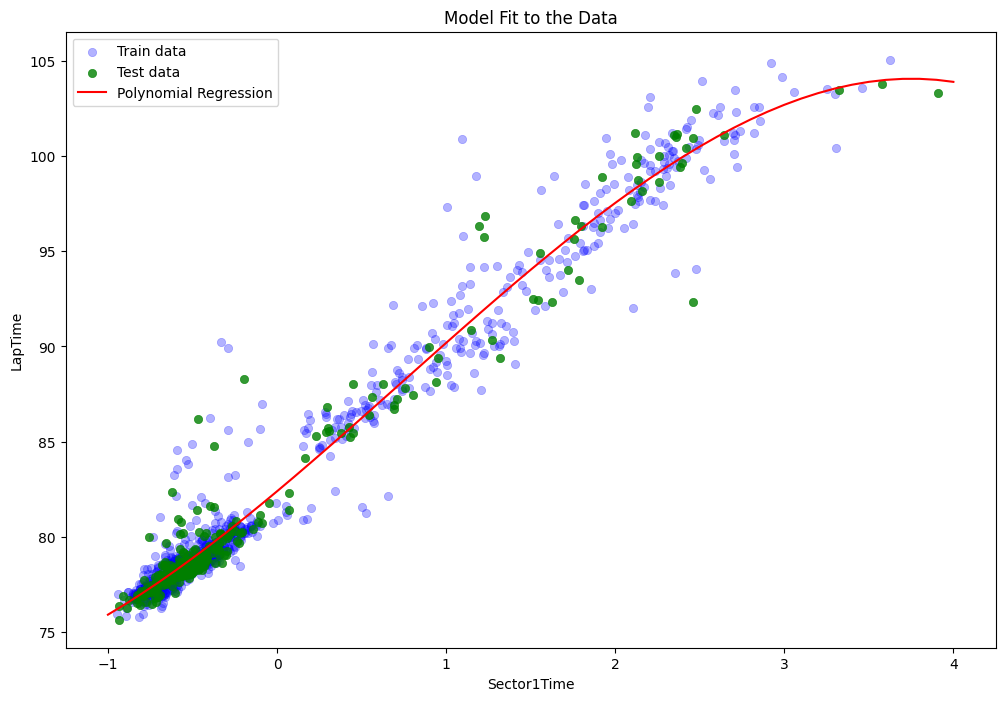

In [99]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = X_train_scaled.flatten(), y = Y_train, color = ('blue', 0.3), edgecolors = None, label = 'Train data')
sns.scatterplot(x = X_test_scaled.flatten(), y = Y_test, color = ('green', 0.8), edgecolors = None, label = 'Test data')

X_range = [[i/10] for i in range(-10, 41)]
X_range_poly = poly.transform(X_range)
y_range_pred = model_poly.predict(X_range_poly)
plot = sns.lineplot(x = [x[0] for x in X_range], y = y_range_pred, color = 'red', label = 'Polynomial Regression')

plot.set_xlabel('Sector1Time')
plot.set_ylabel('LapTime')
plot.set_title('Model Fit to the Data')
plt.show()

<div class="alert alert-block alert-info">
    <b>Exercise:</b> Train, evaluate, and plot a <i>Polynomial Regression</i> model (<code>model_poli_2</code>) with degree 10. Create new variables to avoid overwriting the previous model.
</div>

--- Train ---
Mean Absolute Error (Train): 0.7565206611346025
Mean Squared Error (Train): 1.7863604185464221
R-squared (Train): 0.9670192779581532

--- Test ---
Mean Absolute Error (Test): 0.8665574748201795
Mean Squared Error (Test): 4.633014644006216
R-squared (Test): 0.9090004221990989


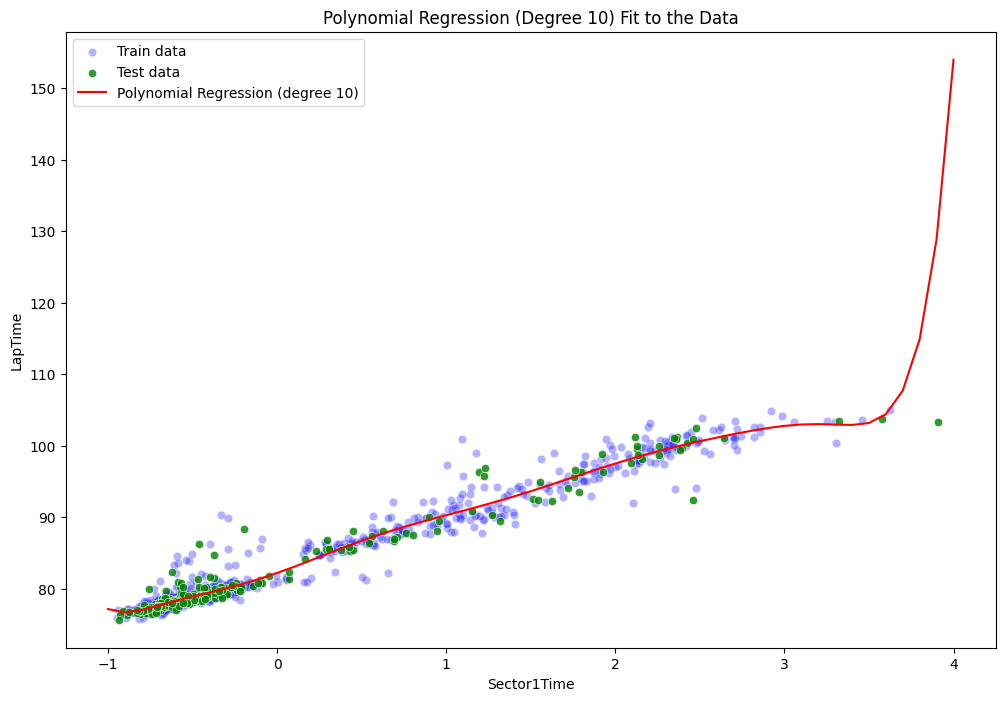

In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the polynomial regression model (degree 10)
poly_10 = PolynomialFeatures(degree=10)
X_train_poly_10 = poly_10.fit_transform(X_train_scaled)
X_test_poly_10 = poly_10.transform(X_test_scaled)

model_poli_2 = LinearRegression()
model_poli_2.fit(X_train_poly_10, Y_train)

print(f"--- Train ---")
mae_train_poly = mean_absolute_error(Y_train, model_poli_2.predict(X_train_poly_10))
mse_train_poly = mean_squared_error(Y_train, model_poli_2.predict(X_train_poly_10))
r2_train_poly = r2_score(Y_train, model_poli_2.predict(X_train_poly_10))

print(f"Mean Absolute Error (Train): {mae_train_poly}")
print(f"Mean Squared Error (Train): {mse_train_poly}")
print(f"R-squared (Train): {r2_train_poly}")

print(f"\n--- Test ---")
mae_test_poly = mean_absolute_error(Y_test, model_poli_2.predict(X_test_poly_10))
mse_test_poly = mean_squared_error(Y_test, model_poli_2.predict(X_test_poly_10))
r2_test_poly = r2_score(Y_test, model_poli_2.predict(X_test_poly_10))

print(f"Mean Absolute Error (Test): {mae_test_poly}")
print(f"Mean Squared Error (Test): {mse_test_poly}")
print(f"R-squared (Test): {r2_test_poly}")



plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_train_scaled.flatten(), y=Y_train, color='blue', alpha=0.3, label='Train data')
sns.scatterplot(x=X_test_scaled.flatten(), y=Y_test, color='green', alpha=0.8, label='Test data')


X_range = [[i/10] for i in range(-10, 41)]  
X_range_poly = poly_10.transform(X_range)
y_range_pred = model_poli_2.predict(X_range_poly)


sns.lineplot(x=[x[0] for x in X_range], y=y_range_pred, color='red', label='Polynomial Regression (degree 10)')


plt.xlabel('Sector1Time')
plt.ylabel('LapTime')
plt.title('Polynomial Regression (Degree 10) Fit to the Data')
plt.legend()
plt.show()


As you can see, if we try to create a model that fits the training data too well, we fall into the so-called **overfitting**.

<div class="alert alert-block alert-info">
    <b>Exercise:</b> Train and evaluate the remaining models (<i>K-Nearest Neighbors</i>, <i>Decision Trees</i>, and <i>SVR</i>) using the following function.
</div>

In [116]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR



def evaluate_model(model, X_train, Y_train, X_test, Y_test, model_name):
    mae_train = mean_absolute_error(Y_train, model.predict(X_train))
    mse_train = mean_squared_error(Y_train, model.predict(X_train))
    r2_train = r2_score(Y_train, model.predict(X_train))
    mae_test = mean_absolute_error(Y_test, model.predict(X_test))
    mse_test = mean_squared_error(Y_test, model.predict(X_test))
    r2_test = r2_score(Y_test, model.predict(X_test))
    results = [model_name, mae_train, mse_train, r2_train, mae_test, mse_test, r2_test]
    return results


all_results = []

# Baseline
results_base = evaluate_model(baseline_media, X_train_scaled, Y_train, X_test_scaled, Y_test, 'Baseline')
all_results.append(results_base)

# Linear
results_lineal = evaluate_model(model_linear, X_train_scaled, Y_train, X_test_scaled, Y_test, 'Linear')
all_results.append(results_lineal)

# Polinomial
results_poly = evaluate_model(model_poly, X_train_poly, Y_train, X_test_poly, Y_test, 'Polynomial (3)')
all_results.append(results_poly)

# Your code here
# The previous models are already trained, remember to train the new ones before passing them to the function

# KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, Y_train)
results_knn = evaluate_model(knn_model, X_train_scaled, Y_train, X_test_scaled, Y_test, 'K-Nearest Neighbors')
all_results.append(results_knn)


# Decision Trees
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, Y_train)
results_dt = evaluate_model(dt_model, X_train_scaled, Y_train, X_test_scaled, Y_test, 'Decision Tree')
all_results.append(results_dt)


# SVR
svr_model = SVR()
svr_model.fit(X_train_scaled, Y_train)
results_svr = evaluate_model(svr_model, X_train_scaled, Y_train, X_test_scaled, Y_test, 'SVR')
all_results.append(results_svr)

# Print the resulting dataframe
multi_index = pd.MultiIndex.from_tuples([ ('Model', 'Name'), ('Train', 'MAE'), ('Train', 'MSE'), ('Train', 'R^2'), ('Test', 'MAE'), ('Test', 'MSE'), ('Test', 'R^2')])    
all_results = pd.DataFrame(all_results, columns = multi_index)
all_results


#BEST TRAINNING -- DECISION TREE
#BEST TEST -- POLY3

Model     Train                           Test             \
                  Name       MAE        MSE       R^2       MAE        MSE   
0             Baseline  5.945402  54.163775  0.000000  5.674141  51.038741   
1               Linear  0.834225   1.938136  0.964217  0.865939   2.186780   
2       Polynomial (3)  0.782216   1.814179  0.966506  0.777992   1.790080   
3  K-Nearest Neighbors  0.716807   1.429544  0.973607  0.901132   2.255306   
4        Decision Tree  0.133797   0.158036  0.997082  1.104232   3.786304   
5                  SVR  0.758107   1.945321  0.964084  0.819487   2.272776   

             
        R^2  
0 -0.002480  
1  0.957048  
2  0.964840  
3  0.955702  
4  0.925631  
5  0.955359

<hr>

## **3. Exercise 2**

We are asked to perform the following task:

<div class="alert alert-block alert-info">
    <b>Exercise:</b> Create a model capable of predicting, from <i>LapTime</i>, using <i>SpeedI1</i>, <i>SpeedI2</i>, <i>SpeedFL</i>, <i>SpeedST</i>, and <i>TyreLife</i>. Which model has the best results?
</div>

In [134]:
data_cleaned = data_cleaned.dropna(subset=['SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'TyreLife', 'LapTime'])


X = data_cleaned[['SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'TyreLife']]
Y = data_cleaned['LapTime']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



def evaluate_model(model, X_train, Y_train, X_test, Y_test, model_name):
    mae_train = mean_absolute_error(Y_train, model.predict(X_train))
    mse_train = mean_squared_error(Y_train, model.predict(X_train))
    r2_train = r2_score(Y_train, model.predict(X_train))
    mae_test = mean_absolute_error(Y_test, model.predict(X_test))
    mse_test = mean_squared_error(Y_test, model.predict(X_test))
    r2_test = r2_score(Y_test, model.predict(X_test))
    results = [model_name, mae_train, mse_train, r2_train, mae_test, mse_test, r2_test]
    return results


all_results = []


linear_model = LinearRegression()
linear_model.fit(X_train_scaled, Y_train)
results_linear = evaluate_model(linear_model, X_train_scaled, Y_train, X_test_scaled, Y_test, 'Linear Regression')
all_results.append(results_linear)


knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, Y_train)
results_knn = evaluate_model(knn_model, X_train_scaled, Y_train, X_test_scaled, Y_test, 'K-Nearest Neighbors')
all_results.append(results_knn)


dt_model = DecisionTreeRegressor(random_state=seed)
dt_model.fit(X_train_scaled, Y_train)
results_dt = evaluate_model(dt_model, X_train_scaled, Y_train, X_test_scaled, Y_test, 'Decision Tree')
all_results.append(results_dt)


svr_model = SVR()
svr_model.fit(X_train_scaled, Y_train)
results_svr = evaluate_model(svr_model, X_train_scaled, Y_train, X_test_scaled, Y_test, 'SVR')
all_results.append(results_svr)


poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)
results_poly = evaluate_model(poly_model, X_train_poly, Y_train, X_test_poly, Y_test, 'Polynomial Regression (degree 3)')
all_results.append(results_poly)


multi_index = pd.MultiIndex.from_tuples([
    ('Model', 'Name'),
    ('Train', 'MAE'),
    ('Train', 'MSE'),
    ('Train', 'R^2'),
    ('Test', 'MAE'),
    ('Test', 'MSE'),
    ('Test', 'R^2')
])

results_df = pd.DataFrame(all_results, columns=multi_index)


results_df

#Best Train 


Model         Train                          \
                               Name           MAE           MSE       R^2   
0                 Linear Regression  8.842817e+08  1.382670e+18  0.974629   
1               K-Nearest Neighbors  5.718921e+08  9.456071e+17  0.982649   
2                     Decision Tree  0.000000e+00  0.000000e+00  1.000000   
3                               SVR  4.923284e+09  6.874635e+19 -0.261450   
4  Polynomial Regression (degree 3)  7.255931e+08  1.043786e+18  0.980847   

           Test                          
            MAE           MSE       R^2  
0  9.321711e+08  1.677874e+18  0.968743  
1  7.854687e+08  1.742535e+18  0.967538  
2  9.320652e+08  2.009592e+18  0.962564  
3  4.308956e+09  6.348778e+19 -0.182707  
4  8.400033e+08  2.079610e+18  0.961259